# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from WeatherPy import request_city, make_row, safe_open_w, make_graph
from scipy.stats import linregress
import os

# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set seed for reproducability (comment out for more random results)
np.random.seed(1)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
data = []
json = []
for index, city in enumerate(cities):
    r = request_city(city)
    json.append(r.json())
    if (r.status_code == 200):
        row = make_row(r.json())
        data.append(row)
        cityname = row["name"]
        print(f"Found {cityname}! (#{index+1} of {len(cities)})")
    else:
        print(f"{city} not found.")
print(f"Finished searching.  Found {len(data)} of {len(cities)} cities searched for.")
with safe_open_w("../output_data/fulldata.json") as output:
    output.write(str(json))
weather_df = pd.DataFrame(data).set_index(["name", "country"])

Found Rikitea! (#1 of 644)
Found Pārsābād! (#2 of 644)
Found Port Alfred! (#3 of 644)
Found Arraial do Cabo! (#4 of 644)
Found Mataura! (#5 of 644)
Found Hermanus! (#6 of 644)
Found Cape Town! (#7 of 644)
Found Geraldton! (#8 of 644)
Found Pisco! (#9 of 644)
Found Acaraú! (#10 of 644)
Found Puerto Ayora! (#11 of 644)
Found Oruzgan! (#12 of 644)
Found Dunedin! (#13 of 644)
Found Yellowknife! (#14 of 644)
Found Albany! (#15 of 644)
Found Bryan! (#16 of 644)
Found Avarua! (#17 of 644)
Found Atuona! (#18 of 644)
Found Bluff! (#19 of 644)
Found New Norfolk! (#20 of 644)
Found Chapais! (#21 of 644)
Found Cherskiy! (#22 of 644)
Found Esperance! (#23 of 644)
Found Vila Franca do Campo! (#24 of 644)
Found Hofn! (#25 of 644)
belushya guba not found.
Found Vaini! (#27 of 644)
Found Punta Arenas! (#28 of 644)
Found Provideniya! (#29 of 644)
taolanaro not found.
Found Menongue! (#31 of 644)
Found Narsaq! (#32 of 644)
Found Betong! (#33 of 644)
Found Half Moon Bay! (#34 of 644)
Found Lebu! (#35 of 6

## (Optional) Import csv of previous execution
#### To skip having to make 600+ web calls during testing of graphs

In [4]:
# weather_df = pd.read_csv(output_data_file, encoding = "UTF-16")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
with safe_open_w(output_data_file) as output:
    weather_df.to_csv(output)
weather_df.head(1)

,,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
name,country,,,,,,,,
Rikitea,PF,-23.1203,-134.9692,74.44,74.44,75,1,9.86,1624767295


In [6]:
weather_df.describe()

,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,20.387086,15.163643,69.691920,68.959316,71.090150,56.414023,6.991619,1.624767e+09
std,32.741801,88.231764,13.672718,13.661133,21.190612,38.265123,4.955119,1.002534e+02
min,-54.800000,-175.200000,30.150000,30.150000,1.000000,0.000000,0.000000,1.624767e+09
25%,-6.526700,-65.348250,59.905000,58.955000,58.500000,20.000000,3.440000,1.624767e+09
50%,22.933300,18.957000,71.600000,71.010000,76.000000,69.000000,5.750000,1.624767e+09
75%,47.953850,91.448600,80.495000,79.810000,88.000000,94.000000,9.440000,1.624767e+09
max,78.218600,178.416700,107.600000,104.700000,100.000000,100.000000,26.220000,1.624768e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

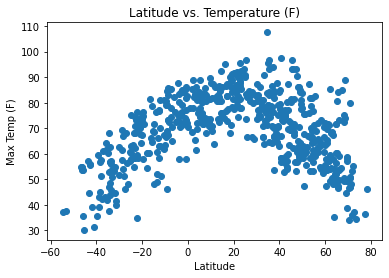

In [7]:
make_graph(x = weather_df["lat"], y = weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp (F)", title = "Latitude vs. Temperature (F)").show()

## Latitude vs. Humidity Plot

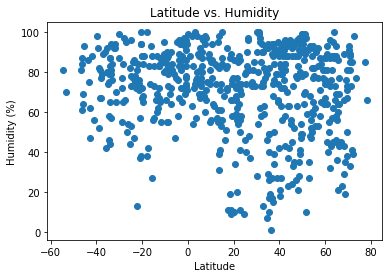

In [8]:
make_graph(x = weather_df["lat"], y = weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Latitude vs. Humidity").show()

## Latitude vs. Cloudiness Plot

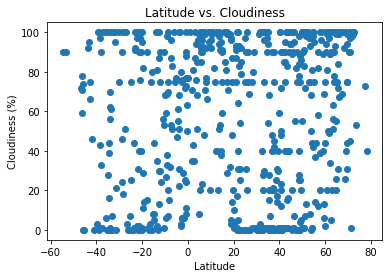

In [9]:
make_graph(x = weather_df["lat"], y = weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Latitude vs. Cloudiness").show()

## Latitude vs. Wind Speed Plot

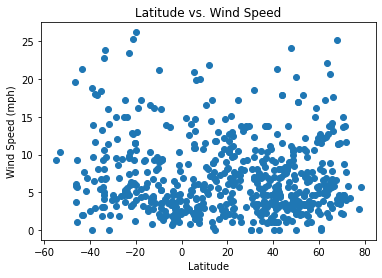

In [10]:
make_graph(x = weather_df["lat"], y = weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Latitude vs. Wind Speed").show()

## Linear Regression

In [11]:
north_weather_df = weather_df[weather_df["lat"] >= 0]
south_weather_df = weather_df[weather_df["lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.61888


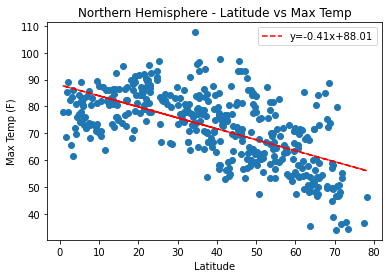

In [12]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp (F)", title = "Northern Hemisphere - Latitude vs Max Temp", linreg = True).show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.74101


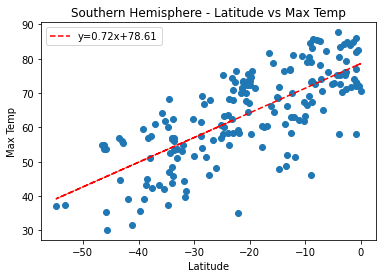

In [13]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp", title = "Southern Hemisphere - Latitude vs Max Temp", linreg = True).show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = -0.05950


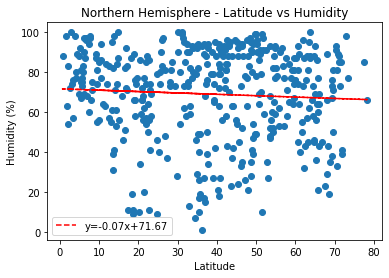

In [14]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Northern Hemisphere - Latitude vs Humidity", linreg = True).show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.11512


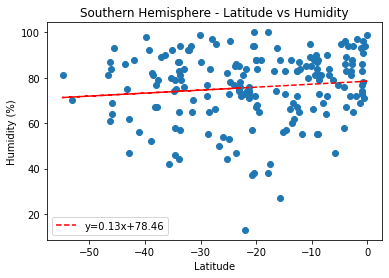

In [15]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Southern Hemisphere - Latitude vs Humidity", linreg = True).show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = -0.00301


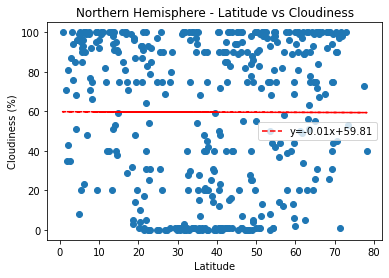

In [16]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Northern Hemisphere - Latitude vs Cloudiness", linreg = True).show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = -0.01812


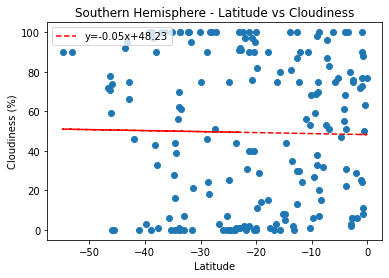

In [17]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Southern Hemisphere - Latitude vs Cloudiness", linreg = True).show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.00218


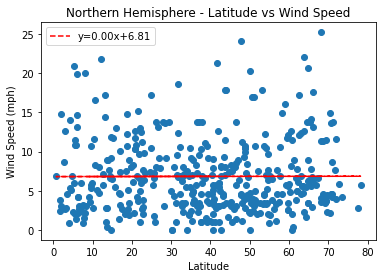

In [18]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Northern Hemisphere - Latitude vs Wind Speed", linreg = True).show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.25905


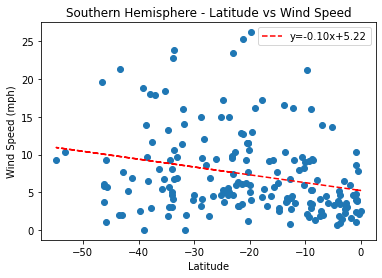

In [19]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Southern Hemisphere - Latitude vs Wind Speed", linreg = True).show()